<a href="https://colab.research.google.com/github/pandeydivyank/cs50/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q keras

In [2]:
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
X_train


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

(60000, 28, 28)


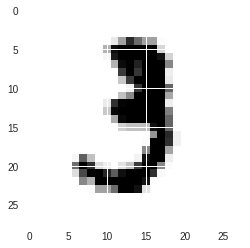

In [11]:
print(X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[10])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

In [15]:
print(X_test.shape)

(10000, 28, 28)


In [0]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [0]:
X_train = X_train.astype('float32')

In [0]:
X_test = X_test.astype('float32')

In [0]:
X_train/= 25

In [0]:
X_test/= 25

In [23]:
print("X_train shape: ", X_train.shape)

X_train shape:  (60000, 28, 28, 1)


In [25]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [0]:
## converting class vectors to binary matrices

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K 


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])

In [43]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=15,
          verbose=1,
          validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 170s 3ms/step - loss: 0.2216 - acc: 0.9317 - val_loss: 0.0415 - val_acc: 0.9860
Epoch 2/15
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0848 - acc: 0.9745 - val_loss: 0.0383 - val_acc: 0.9882
Epoch 3/15
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0653 - acc: 0.9806 - val_loss: 0.0319 - val_acc: 0.9895
Epoch 4/15
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0548 - acc: 0.9835 - val_loss: 0.0273 - val_acc: 0.9911
Epoch 5/15
60000/60000 [==============================] - 169s 3ms/step - loss: 0.0442 - acc: 0.9859 - val_loss: 0.0311 - val_acc: 0.9903
Epoch 6/15
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0403 - acc: 0.9877 - val_loss: 0.0267 - val_acc: 0.9919
Epoch 7/15
60000/60000 [==============================] - 168s 3ms/step - 

In [44]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03402411467424918
Test accuracy: 0.9912
